In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales_df = pd.read_csv('supermarket_sales.csv') #reading csv file

sales_df.head() #printing first 5 rows to understand data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [200]:
#finding the sum of all missing values in each column - isnull() returns true or false and sum returns the total
sales_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


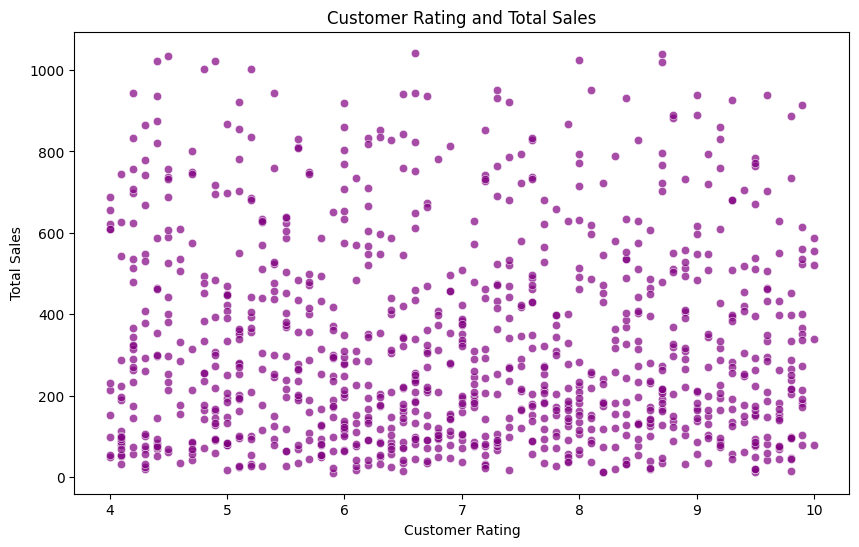

In [201]:
# scatter plot to visualize the relationship between customer rating and total sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Total', data=sales_df, color='purple', alpha=0.7)
plt.xlabel('Customer Rating')
plt.ylabel('Total Sales')
plt.title('Customer Rating and Total Sales')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


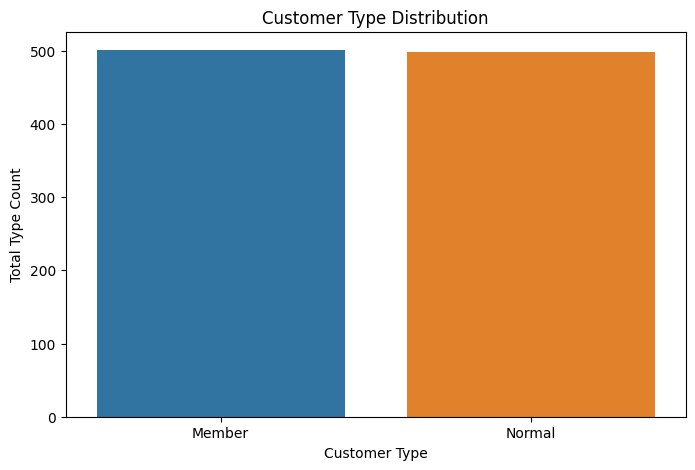

In [202]:
# occurrences of each customer type - value counts gives the unique value which will give us the total of each customer type
type_cnt = sales_df['Customer type'].value_counts()

# bar plot to visualize customer type distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=type_cnt.index, y=type_cnt.values)
plt.xlabel('Customer Type')
plt.ylabel('Total Type Count')
plt.title('Customer Type Distribution')
plt.show()

In [213]:
import numpy as np
from sklearn.datasets import fetch_openml #fetch_openml is a function from scikit-learn datasets which is used to load the MNIST data here
from sklearn.decomposition import PCA

In [214]:
# Load the MNIST dataset
mnist_data = fetch_openml('mnist_784')
A = mnist.data #here we are extracting pixel value of images and storing in A
z = mnist.target.astype(int) # here we extract the digits from the dataset and store in z

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [215]:
# Standardize the data
A_mean = np.mean(A, axis=0) #calculates the mean of each feature in A and stores it A_mean
A_std = np.std(A, axis=0) #calculates the std deviation of each feature in A and stores it A_std
A_normalized = (A - A_mean) / A_std #this formula is commonly used before doing PCA so that it performs better. Data will have mean 0 and std dev 1

In [216]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean') #creating instance and storing it in imputer
A_imputed = imputer.fit_transform(A_normalized) #this replaces any with mean of that coloumn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6' 'pixel7' 'pixel8'
 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel17' 'pixel18' 'pixel19'
 'pixel20' 'pixel21' 'pixel22' 'pixel23' 'pixel24' 'pixel25' 'pixel26'
 'pixel27' 'pixel28' 'pixel29' 'pixel30' 'pixel31' 'pixel32' 'pixel53'
 'pixel54' 'pixel55' 'pixel56' 'pixel57' 'pixel58' 'pixel83' 'pixel84'
 'pixel85' 'pixel86' 'pixel112' 'pixel113' 'pixel141' 'pixel169'
 'pixel477' 'pixel561' 'pixel645' 'pixel672' 'pixel673' 'pixel674'
 'pixel700' 'pixel701' 'pixel702' 'pixel728' 'pixel729' 'pixel730'
 'pixel731' 'pixel755' 'pixel756' 'pixel757' 'pixel758' 'pixel759'
 'pixel760' 'pixel781' 'pixel782' 'pixel783' 'pixel784']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [217]:
n = 2 #setting number of components to 2 since we have to visualize to 2D 
pca1 = PCA(n_components=n) #creating instance with 2 components
A_pca = pca1.fit_transform(A_imputed) #A_pca here will now have data with 2 dimensional space. this is compute the princple component

/var/folders/r1/6ksbnp2j5z3f0nlr5llpw_540000gn/T/ipykernel_17219/3175028976.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(A_pca[:, 0], A_pca[:, 1], c=z, cmap=plt.cm.get_cmap('jet', 10)) # here plot a scatter plot with two pca's- A_pca[:, 0],A_pca[:, 1].color of each data point is identified by c=z and then we map it usng color map 'jet' with 10 different colors


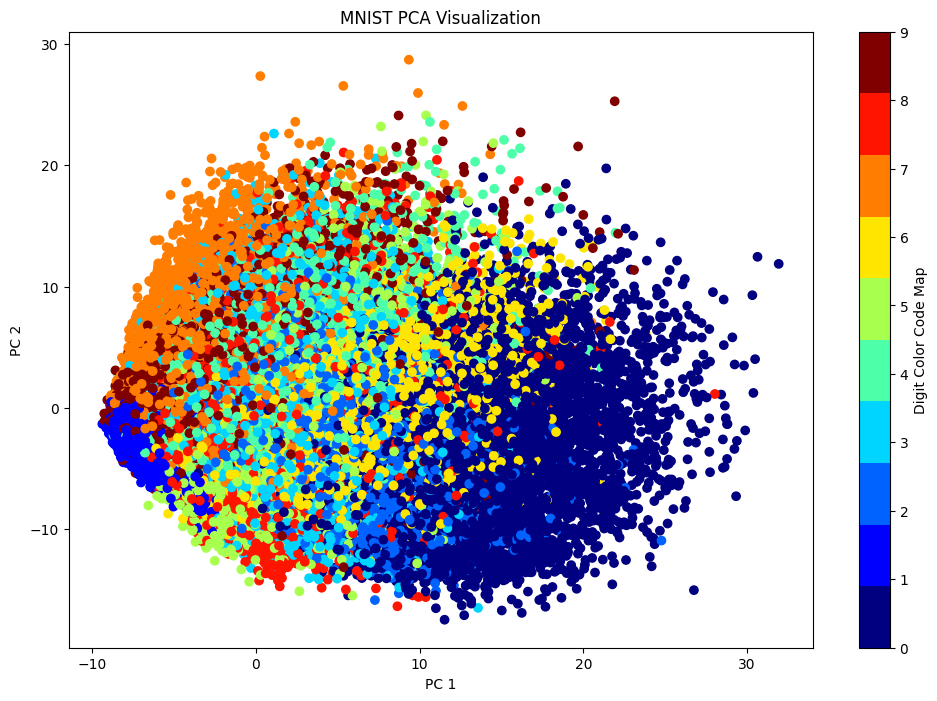

In [218]:
# 2D visualization of the processed data
plt.figure(figsize=(12, 8))
plt.scatter(A_pca[:, 0], A_pca[:, 1], c=z, cmap=plt.cm.get_cmap('jet', 10)) # here plot a scatter plot with two pca's- A_pca[:, 0],A_pca[:, 1].color of each data point is identified by c=z and then we map it usng color map 'jet' with 10 different colors
plt.colorbar(label='Digit Color Code Map', ticks=range(10)) #the color bar on the right is done by this code. range is give 10 so 0-9
plt.title('MNIST PCA Visualization')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [316]:
# Load the dataset
url = "bankdata_csv_all.csv" 
df1 = pd.read_csv(url)
df1.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [317]:
missing_values = df1.isnull().sum()
print(missing_values)

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64


In [318]:
# One-hot encoding
df2 = pd.get_dummies(df1, columns=['sex', 'region'], drop_first=True) #we create 4 dummy variables since we have 5 categories sex-2 and region-3 using get_dummies method of one-hot encoding and store it in a new data frame df2

# Label binary variables with 1 and 0 where YES=1 and NO=0
var_bi = ['married', 'car', 'save_act', 'current_act', 'mortgage', 'pep'] #stored all binary vairables in an array so that we can iterate through each data points of theses columns
for item in var_bi:
    df2[item] = df2[item].map({'YES': 1, 'NO': 0}) #mapping {'YES': 1, 'NO': 0} using map funtion and replacing it in the dataframe

df2.head() #printing to check

,id,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_MALE,region_RURAL,region_SUBURBAN,region_TOWN
0,ID12101,48,17546.0,0,1,0,0,0,0,1,False,False,False,False
1,ID12102,40,30085.1,1,3,1,0,1,1,0,True,False,False,True
2,ID12103,51,16575.4,1,0,1,1,1,0,0,False,False,False,False
3,ID12104,23,20375.4,1,3,0,0,1,0,0,False,False,False,True
4,ID12105,57,50576.3,1,0,0,1,0,0,0,False,True,False,False


In [319]:
# Standardize numerical features
scaler = StandardScaler()
var_numerical = ['age', 'income', 'children']  #storing all numerical variables in an array
df2[var_numerical] = scaler.fit_transform(df1[var_numerical])
features[var_numerical] = scaler.fit_transform(features[var_numerical])
print(features.dtypes)
features.head()

age                float64
income             float64
married              int64
children           float64
car                  int64
save_act             int64
current_act          int64
mortgage             int64
sex_MALE              bool
region_RURAL          bool
region_SUBURBAN       bool
region_TOWN           bool
dtype: object


,age,income,married,children,car,save_act,current_act,mortgage,sex_MALE,region_RURAL,region_SUBURBAN,region_TOWN
0,0.388887,-0.774168,0,-0.011049,0,0,0,0,False,False,False,False
1,-0.166170,0.198706,1,1.883121,1,0,1,1,True,False,False,True
2,0.597034,-0.849474,1,-0.958135,1,1,1,0,False,False,False,False
3,-1.345667,-0.554643,1,1.883121,0,0,1,0,False,False,False,True
4,1.013327,1.788562,1,-0.958135,0,1,0,0,False,True,False,False


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

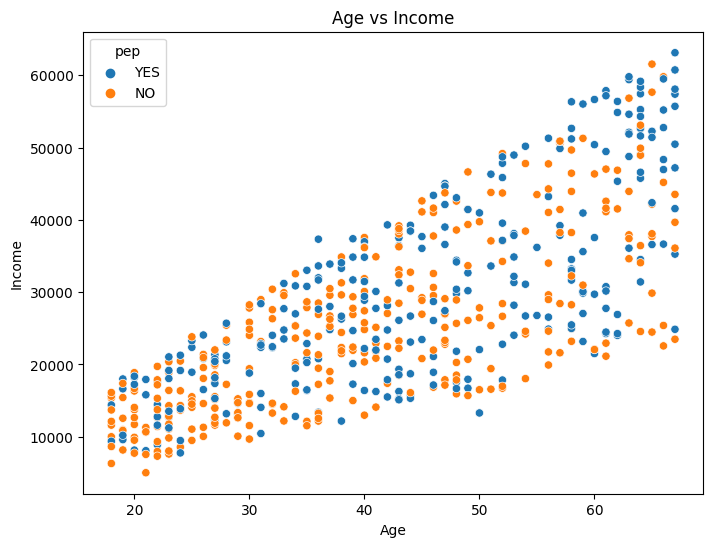

In [320]:
# Scatter plot to visualize the relationship between age and income with PEP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='income', data=df1, hue='pep')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

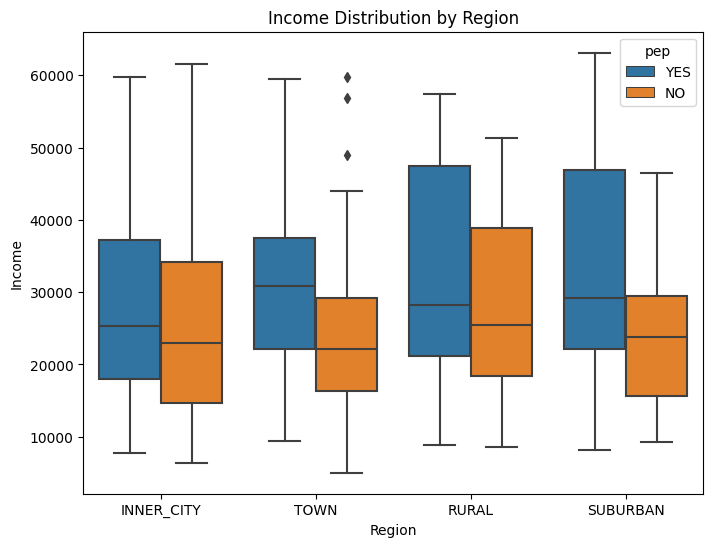

In [321]:
# Box plot to visualize income distribution by region and PEP
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='income', data=df1, hue='pep')
plt.title('Income Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Income')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

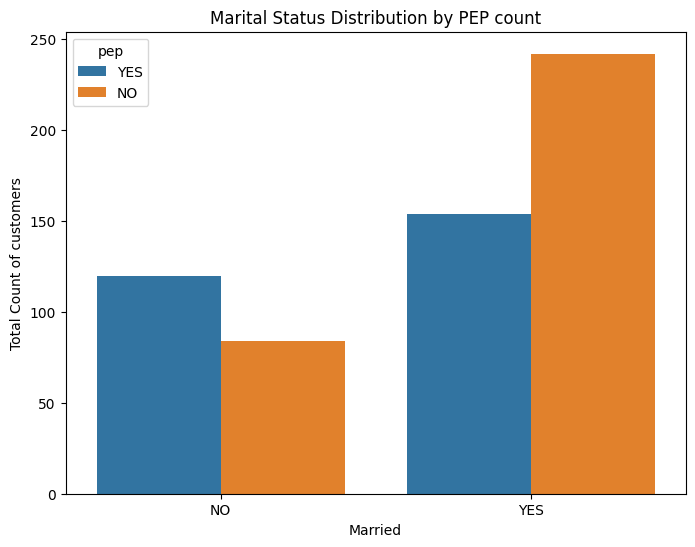

In [322]:
# Bar plot to visualize the distribution of marital status
plt.figure(figsize=(8, 6))
sns.countplot(x='married', data=df1, hue='pep')
plt.title('Marital Status Distribution by PEP count')
plt.xlabel('Married')
plt.ylabel('Total Count of customers')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

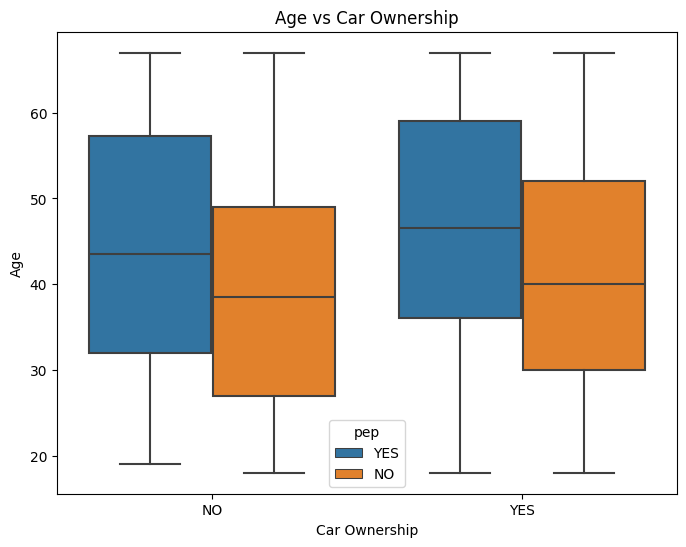

In [323]:
# Box plot to visualize age distribution by car ownership
plt.figure(figsize=(8, 6))
sns.boxplot(x='car', y='age', data=df1, hue='pep')
plt.title('Age vs Car Ownership')
plt.xlabel('Car Ownership')
plt.ylabel('Age')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

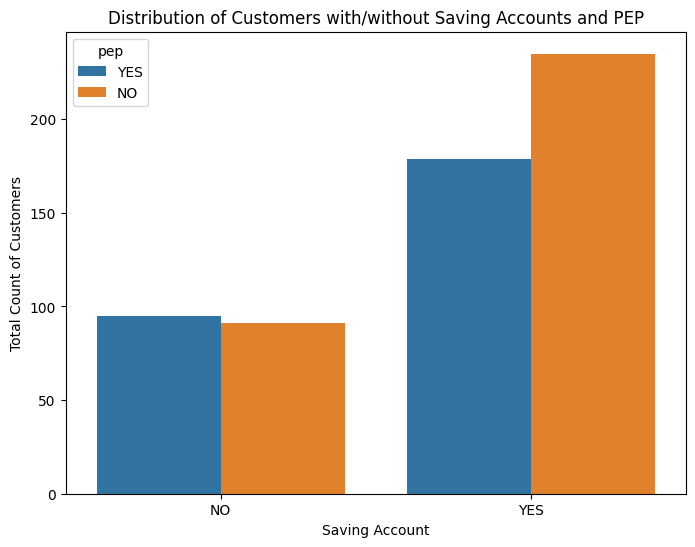

In [324]:
# Bar plot to visualize the distribution of customers with/without saving accounts and whether they have PEP
plt.figure(figsize=(8, 6))
sns.countplot(x='save_act', data=df1, hue='pep')
plt.title('Distribution of Customers with/without Saving Accounts and PEP')
plt.xlabel('Saving Account')
plt.ylabel('Total Count of Customers')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

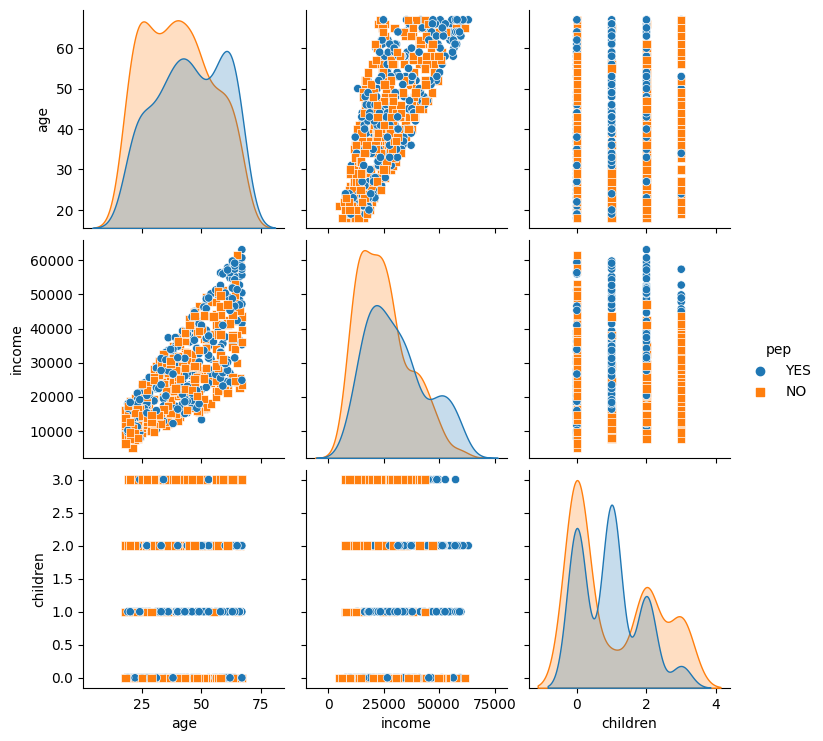

In [336]:
sns.pairplot(df1[['age', 'income', 'children', 'pep']], hue='pep', markers=['o', 's'])
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

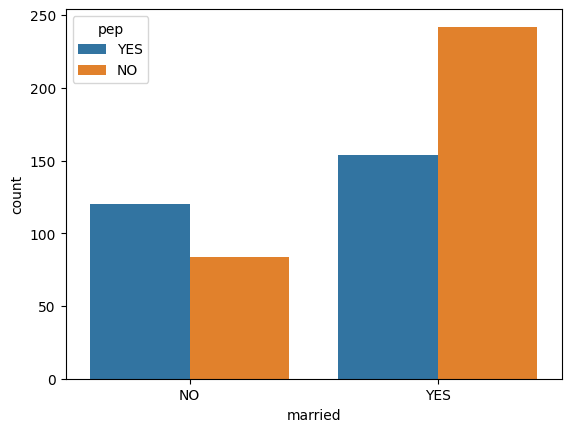

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

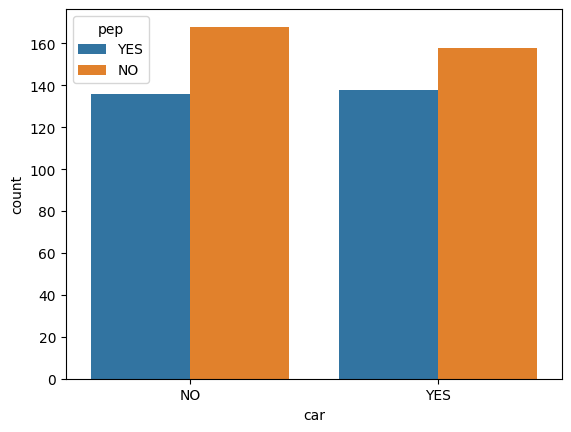

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

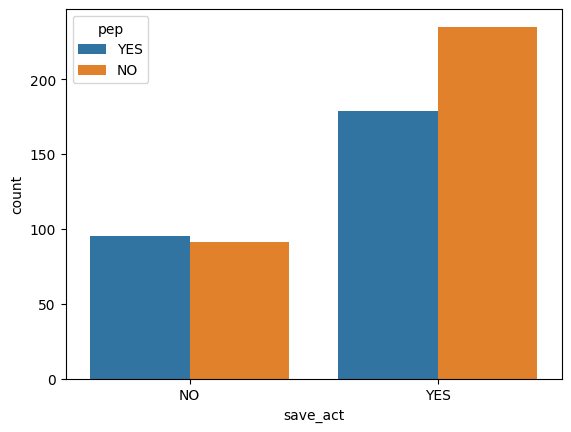

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

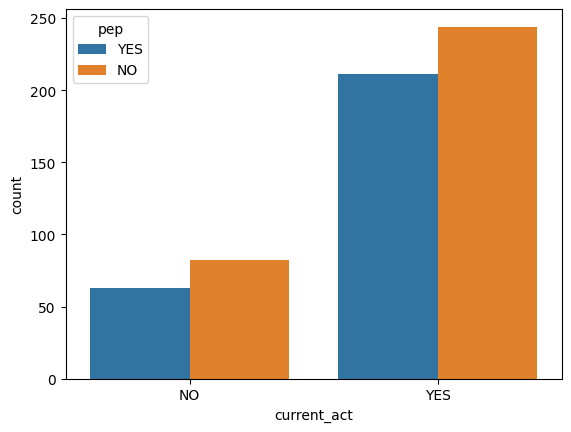

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

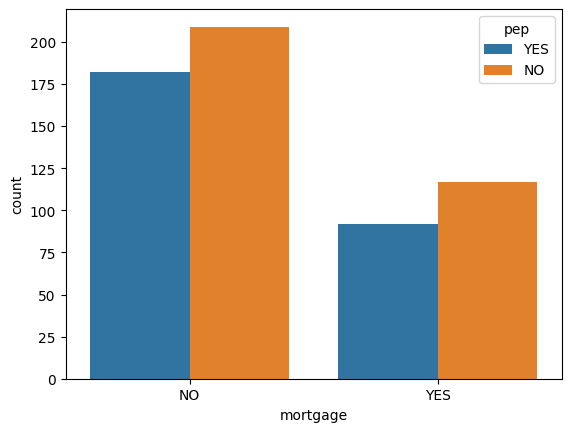

In [335]:
categorical_vars = ['married', 'car', 'save_act', 'current_act', 'mortgage']
for var in categorical_vars:
    sns.countplot(data=df1, x=var, hue='pep')
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


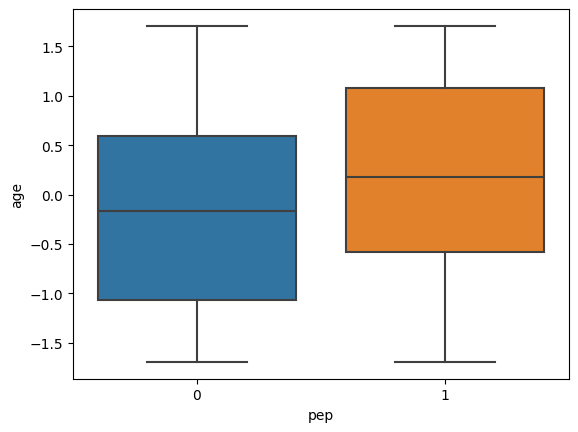

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


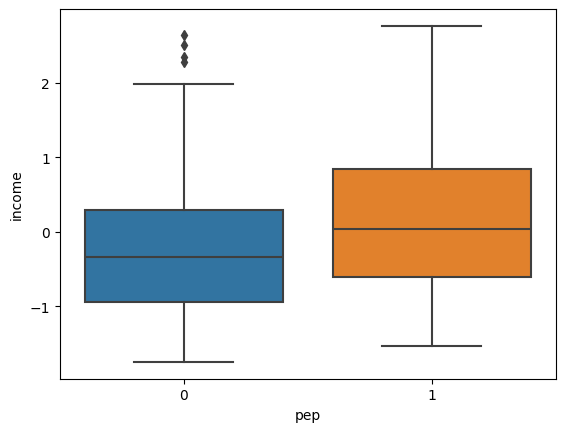

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


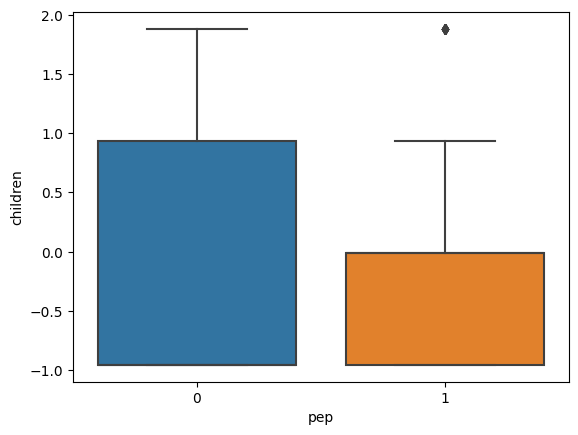

In [334]:
for var in num_vars:
    sns.boxplot(data=df, y=var, x='pep')
    plt.show()


In [325]:
features = df2.drop(columns=['id', 'pep'])
features.head()

,age,income,married,children,car,save_act,current_act,mortgage,sex_MALE,region_RURAL,region_SUBURBAN,region_TOWN
0,0.388887,-0.774168,0,-0.011049,0,0,0,0,False,False,False,False
1,-0.166170,0.198706,1,1.883121,1,0,1,1,True,False,False,True
2,0.597034,-0.849474,1,-0.958135,1,1,1,0,False,False,False,False
3,-1.345667,-0.554643,1,1.883121,0,0,1,0,False,False,False,True
4,1.013327,1.788562,1,-0.958135,0,1,0,0,False,True,False,False


In [326]:
# Apply PCA for dimensionality reduction
pca = PCA()
pca_result = pca.fit_transform(features)
df2['PCA1'] = pca_result[:, 0]
df2['PCA2'] = pca_result[:, 1]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

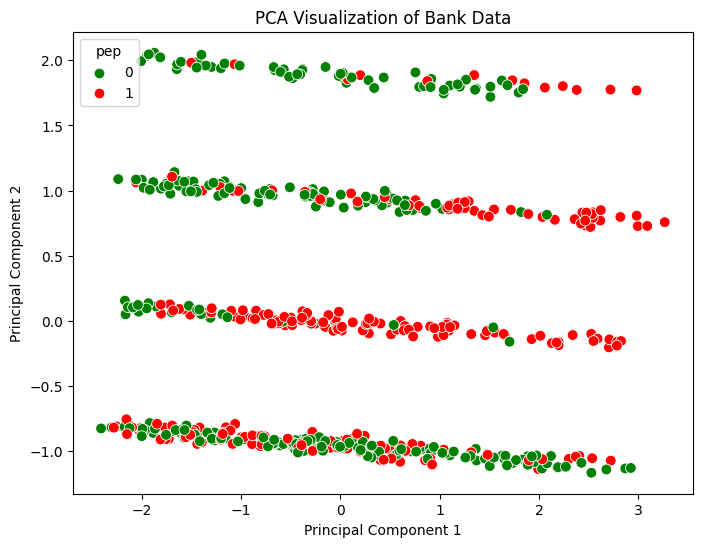

In [327]:
# Scatter plot in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='PCA1', y='PCA2', hue='pep', palette=['g', 'r'], s=60)
plt.title('PCA Visualization of Bank Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [328]:
# Calculate explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
# Print the explained variance ratio for each component
print("Explained Variance Ratio for Each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {ratio:.4f}")

Explained Variance Ratio for Each Principal Component:
Principal Component 1: 0.3709
Principal Component 2: 0.2095
Principal Component 3: 0.0597
Principal Component 4: 0.0535
Principal Component 5: 0.0512
Principal Component 6: 0.0491
Principal Component 7: 0.0481
Principal Component 8: 0.0428
Principal Component 9: 0.0377
Principal Component 10: 0.0363
Principal Component 11: 0.0263
Principal Component 12: 0.0147
